In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/omkarmanohardalvi/lungs-disease-dataset-4-types/data')
#username ve key kısmına aşağıdakileri yapıştırın
#username: yourUserName
#key: yourKEy

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: iremdeniz
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/omkarmanohardalvi/lungs-disease-dataset-4-types


# Import needed libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.regularizers import L1L2, L1, L2
from tensorflow.keras.optimizers import SGD, Adamax
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# Image generator

In this phase we will:
* Rescale the pixels from [0-255] to [0-1]
* Reduce image size
* Add some changes such as:
  * Rotation
  * Shearing
  * Flipping
  * Brightness change
  * shifting

In [ ]:
train_gen = ImageDataGenerator(rotation_range = 0.2,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True,
                               vertical_flip = True,
                               brightness_range = [0.8, 1.5],
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               rescale = 1/255
                               )

val_gen = ImageDataGenerator(
                               rescale = 1/255
                         )

test_gen = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_data = train_gen.flow_from_directory("/content/lungs-disease-dataset-4-types/Lung Disease Dataset/train",
                                            target_size=(128, 128),
                                            color_mode="grayscale",
                                            batch_size=128,
                                            shuffle=True
                                           )
val_data = train_gen.flow_from_directory("/content/lungs-disease-dataset-4-types/Lung Disease Dataset/val",
                                           target_size=(128, 128),
                                           color_mode="grayscale",
                                           batch_size=128,
                                           shuffle=True
                                           )

test_data = train_gen.flow_from_directory("/content/lungs-disease-dataset-4-types/Lung Disease Dataset/test",
                                           target_size=(128, 128),
                                           color_mode="grayscale",
                                           batch_size=128,
                                           shuffle=True
                                           )

Found 6054 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.
Found 2025 images belonging to 5 classes.


Dataset classes:

In [ ]:
train_classes = train_data.class_indices
train_classes

{'Bacterial Pneumonia': 0,
 'Corona Virus Disease': 1,
 'Normal': 2,
 'Tuberculosis': 3,
 'Viral Pneumonia': 4}

In [ ]:
test_classes = test_data.class_indices
test_classes

{'Bacterial Pneumonia': 0,
 'Corona Virus Disease': 1,
 'Normal': 2,
 'Tuberculosis': 3,
 'Viral Pneumonia': 4}

1st batch of images and classes:

In [ ]:
#train_data[0]

Image's transformations:

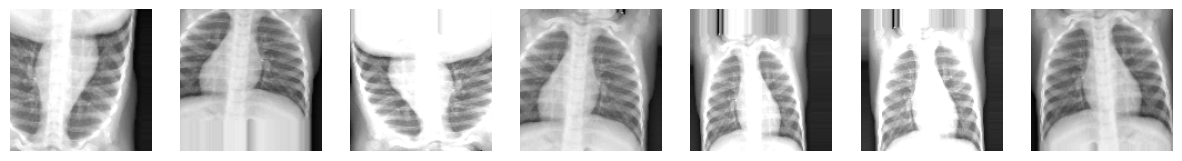

In [ ]:
random_arr = np.random.randint(len(train_data))
random_img = np.random.randint(len(train_data[random_arr][0]))
images = [train_data[random_arr][0][random_img] for i in range(7)]

fig, ax = plt.subplots(ncols=7, figsize=(15, 15))

for i in range(7):
  ax[i].imshow(images[i], cmap="gray")
  ax[i].set_axis_off()

# Deep learning model

In [ ]:
model = Sequential([
    InputLayer(shape=np.shape(train_data[0][0][0])),

    Conv2D(filters=32, kernel_size=(3,3), activation="relu", kernel_initializer="he_normal", padding="same"),
    Conv2D(filters=32, kernel_size=(3,3), activation="relu", kernel_initializer="he_normal", padding="same"),

    MaxPool2D(pool_size=(2, 2)),

    Conv2D(filters=64, kernel_size=(3,3), activation="relu", kernel_initializer="he_normal", padding="same"),
    Conv2D(filters=64, kernel_size=(3,3), activation="relu", kernel_initializer="he_normal", padding="same"),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(filters=128, kernel_size=(3,3), activation="relu", kernel_initializer="he_normal", padding="same"),
    Conv2D(filters=128, kernel_size=(3,3), activation="relu", kernel_initializer="he_normal", padding="same"),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(filters=256, kernel_size=(3,3), activation="relu", kernel_initializer="he_normal", padding="same"),
    Conv2D(filters=256, kernel_size=(3,3), activation="relu", kernel_initializer="he_normal", padding="same"),
    MaxPool2D(pool_size=(2, 2)),

    GlobalAveragePooling2D(),

    Dense(5, activation="softmax"),
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,172,965 (4.47 MB)

 Trainable params: 1,172,965 (4.47 MB)

 Non-trainable params: 0 (0.00 B)

## Compile the model by setting:
* loss function: categorical cross-entropy
* optimizer: adam
* metrics: accuracy

In [ ]:
optimizer = SGD(learning_rate=0.001, momentum=0.9)

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, Metric
from tensorflow.keras import backend as K
# F1-score metrik sınıfı
class F1Score(Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + K.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()


# Model derleme
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy", Precision(name="precision"), Recall(name="recall"), F1Score()]
)

In [ ]:
early_stopping = EarlyStopping(min_delta=0.001, restore_best_weights=True, monitor="val_accuracy", patience=15)

## Fit the model

In [ ]:
history = model.fit(x=train_data,
                    epochs=100,
                    validation_data=val_data,
                    callbacks=[early_stopping]
                    )

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.2306 - f1_score: 0.0471 - loss: 2.1332 - precision: 0.2201 - recall: 0.0290 - val_accuracy: 0.4028 - val_f1_score: 0.0283 - val_loss: 1.4714 - val_precision: 0.8056 - val_recall: 0.0144
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.4358 - f1_score: 0.1377 - loss: 1.3816 - precision: 0.6086 - recall: 0.0812 - val_accuracy: 0.4936 - val_f1_score: 0.3390 - val_loss: 1.2316 - val_precision: 0.5821 - val_recall: 0.2391
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.5036 - f1_score: 0.3622 - loss: 1.1618 - precision: 0.6006 - recall: 0.2600 - val_accuracy: 0.5620 - val_f1_score: 0.3919 - val_loss: 1.1030 - val_precision: 0.6287 - val_recall: 0.2847
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.5902 - f1_score: 0.4895 - loss: 1.0077 - precision: 0.6909 - recall: 0.3804 - val_accuracy: 0.5680 - val_f1_score: 0.5295 - val_loss: 1.0781 - val_precision: 0.6637 - val_recall: 0.4

In [ ]:
model.save("akciğer_modeli.h5")

In [ ]:
# test_data: X_test, Y_test (önceden hazırlanmış test veri seti)
# Instead of using X_test and Y_test, use test_data directly:
results = model.evaluate(test_data, verbose=1)

# Metrik isimlerini al
metrics = model.metrics_names

# Sonuçları yazdır
for name, value in zip(metrics, results):
    print(f"{name}: {value:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8559 - f1_score: 0.8574 - loss: 0.3656 - precision: 0.8630 - recall: 0.8519
loss: 0.3558
compile_metrics: 0.8667


##Model's evaluation

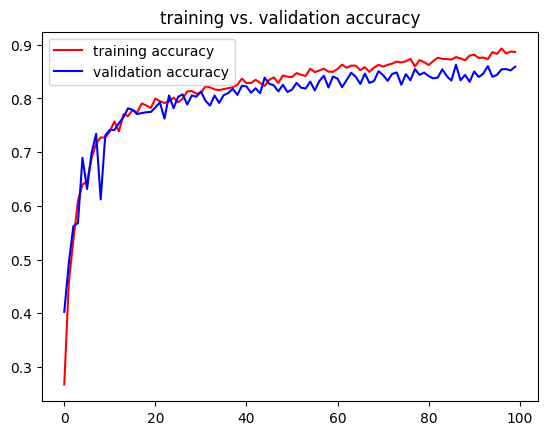

In [ ]:
plt.title("training vs. validation accuracy")
plt.plot(history.history["accuracy"], "r", label="training accuracy")
plt.plot(history.history["val_accuracy"], "b", label="validation accuracy")
plt.legend()

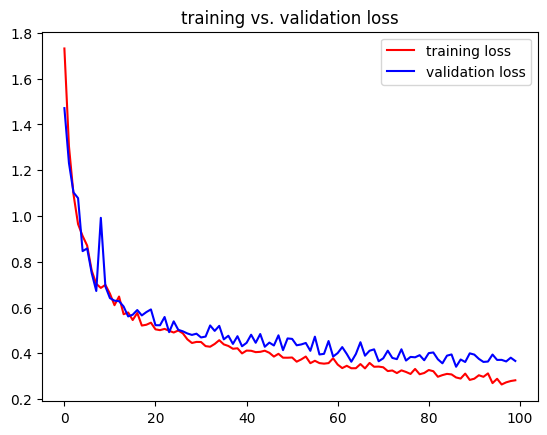

In [ ]:
plt.title("training vs. validation loss")
plt.plot(history.history["loss"], "r", label="training loss")
plt.plot(history.history["val_loss"], "b", label="validation loss")
plt.legend()

In [ ]:
labels = []

for i in range(len(test_data)):
  labels.append(
      test_data[i][1]
  )

In [ ]:
labels_final = []
for i in labels:
  for j in i:
    labels_final.append(np.argmax(j))

In [ ]:
predictions = model.predict(test_data)
predictions = [np.argmax(i) for i in predictions]

16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step


In [ ]:
print(classification_report(labels_final, predictions))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       403
           1       0.96      0.94      0.95       407
           2       0.92      0.95      0.93       404
           3       0.94      0.99      0.96       408
           4       0.71      0.69      0.70       403

    accuracy                           0.86      2025
   macro avg       0.85      0.86      0.86      2025
weighted avg       0.85      0.86      0.86      2025



# Prediction

In [ ]:
random_arr = np.random.randint(len(test_data))
random_img = np.random.randint(len(test_data[random_arr][0]))

In [ ]:
label = list(test_classes.keys())[np.argmax(test_data[random_arr][1][random_img])]
prediction = list(test_classes.keys())[np.argmax(model.predict(np.array([test_data[random_arr][0][random_img]])))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step


expected value: Viral Pneumonia
prediction: Viral Pneumonia


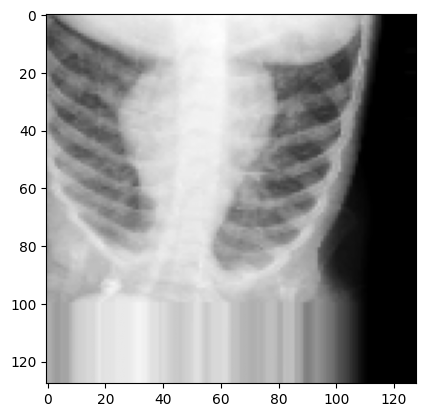

In [ ]:
print(f"expected value: {label}")
print(f"prediction: {prediction}")
plt.imshow(test_data[random_arr][0][random_img], cmap="gray")

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Modeli yükle
model = load_model('/content/akciğer_modeli.h5')  # ← .h5 modelinin yolunu yaz

# Görseli yükle
img_path = "/content/lungs-disease-dataset-4-types/Lung Disease Dataset/test/Corona Virus Disease/00030370_000.png"  # ← tahmin yapılacak görselin yolunu yaz
img = load_img(img_path, target_size=(128, 128), color_mode="grayscale")
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Tahmin
predictions = model.predict(img_array)

# Sınıf isimleri
class_names = [
    'Bacterial Pneumonia',
    'Corona Virus Disease',
    'Normal',
    'Tuberculosis',
    'Viral Pneumonia'
]

# En yüksek olasılığa sahip sınıf
predicted_index = np.argmax(predictions)
predicted_class = class_names[predicted_index]
confidence = predictions[0][predicted_index]

# Sonuçları yazdır
print("Tahmin edilen sınıf:", predicted_class)
print("Güven seviyesi: {:.2f}%".format(confidence * 100))
print("Tüm sınıf olasılıkları:")
for label, prob in zip(class_names, predictions[0]):
    print(f"{label}: {prob:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
Tahmin edilen sınıf: Corona Virus Disease
Güven seviyesi: 100.00%
Tüm sınıf olasılıkları:
Bacterial Pneumonia: 0.0000
Corona Virus Disease: 1.0000
Normal: 0.0000
Tuberculosis: 0.0000
Viral Pneumonia: 0.0000
